In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "valle d'aosta"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
1,2020-02-26T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
2,2020-02-27T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,2.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
3,2020-02-28T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
4,2020-02-29T17:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021-01-31T17:00:00,2,Valle d'Aosta,32,3,35,198,233,-15,16,...,0.0,308.0,103.0,-11.0,8.57,15.02,5.19,15.53,-25.0,-6.05
342,2021-02-01T17:00:00,2,Valle d'Aosta,33,3,36,193,229,-4,3,...,1.0,88.0,23.0,-5.0,8.33,15.72,3.41,13.04,0.0,-1.72
343,2021-02-02T17:00:00,2,Valle d'Aosta,25,3,28,173,201,-28,4,...,0.0,303.0,120.0,-20.0,10.71,13.93,1.32,3.33,0.0,-12.23
344,2021-02-03T17:00:00,2,Valle d'Aosta,29,3,32,157,189,-12,11,...,1.0,352.0,83.0,-16.0,9.38,16.93,3.12,13.25,0.0,-5.97


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 11
Nuovi tamponi: 353.0
Percentuale nuovi positivi/nuovi tamponi: 3.1 %
Nuovi guariti: 12.0
Nuovi deceduti: 0.0
Variazione positivi ricoverati con sintomi: -2.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 1.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-06T17:00:00,2,Valle d'Aosta,102,8,110,877,987,-69,34,...,3.0,277.0,133.0,-63.0,7.27,11.14,12.27,25.56,-11.11,-6.53
1,2020-12-07T17:00:00,2,Valle d'Aosta,105,10,115,829,944,-43,22,...,2.0,221.0,58.0,-48.0,8.70,12.18,9.95,37.93,25.00,-4.36
2,2020-12-08T17:00:00,2,Valle d'Aosta,96,9,105,765,870,-74,18,...,4.0,280.0,88.0,-64.0,8.57,12.07,6.43,20.45,-10.00,-7.84
3,2020-12-09T17:00:00,2,Valle d'Aosta,90,13,103,753,856,-14,17,...,4.0,373.0,97.0,-12.0,12.62,12.03,4.56,17.53,44.44,-1.61
4,2020-12-10T17:00:00,2,Valle d'Aosta,98,10,108,675,783,-73,18,...,1.0,342.0,102.0,-78.0,9.26,13.79,5.26,17.65,-23.08,-8.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-31T17:00:00,2,Valle d'Aosta,32,3,35,198,233,-15,16,...,0.0,308.0,103.0,-11.0,8.57,15.02,5.19,15.53,-25.00,-6.05
57,2021-02-01T17:00:00,2,Valle d'Aosta,33,3,36,193,229,-4,3,...,1.0,88.0,23.0,-5.0,8.33,15.72,3.41,13.04,0.00,-1.72
58,2021-02-02T17:00:00,2,Valle d'Aosta,25,3,28,173,201,-28,4,...,0.0,303.0,120.0,-20.0,10.71,13.93,1.32,3.33,0.00,-12.23
59,2021-02-03T17:00:00,2,Valle d'Aosta,29,3,32,157,189,-12,11,...,1.0,352.0,83.0,-16.0,9.38,16.93,3.12,13.25,0.00,-5.97


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

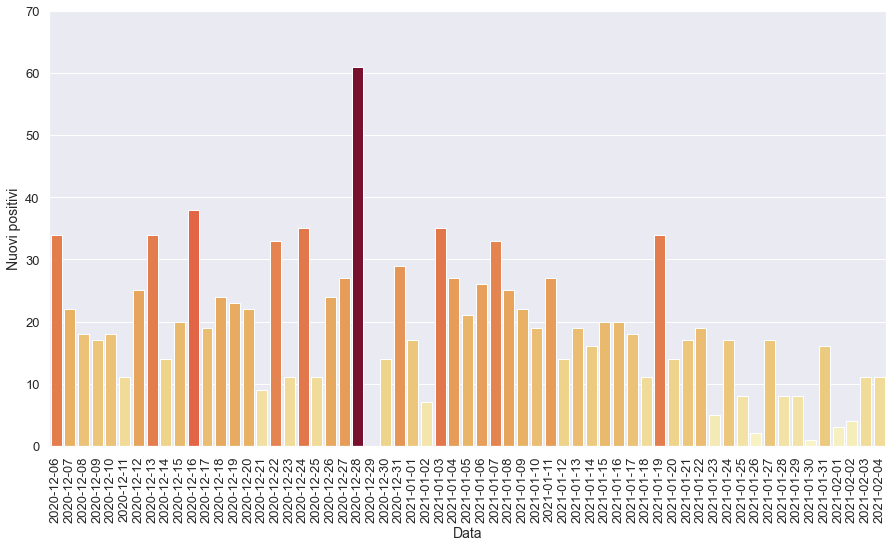

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

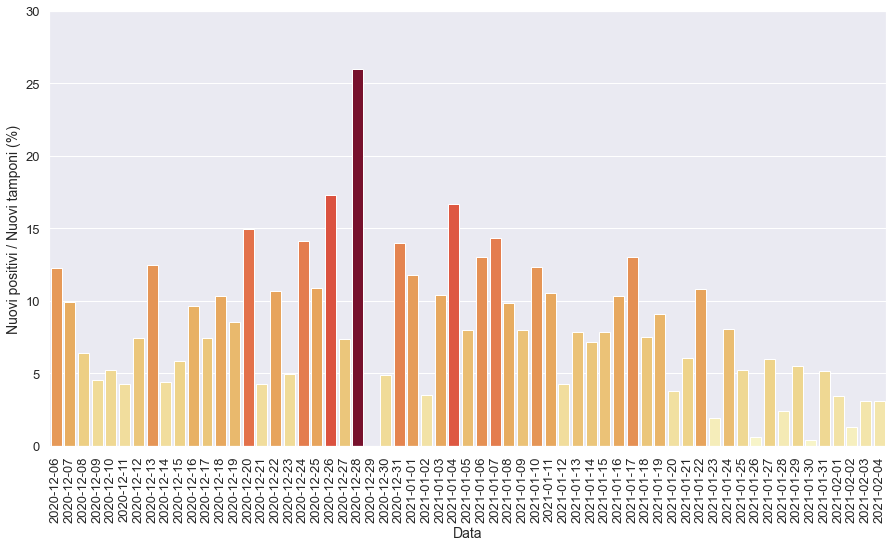

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

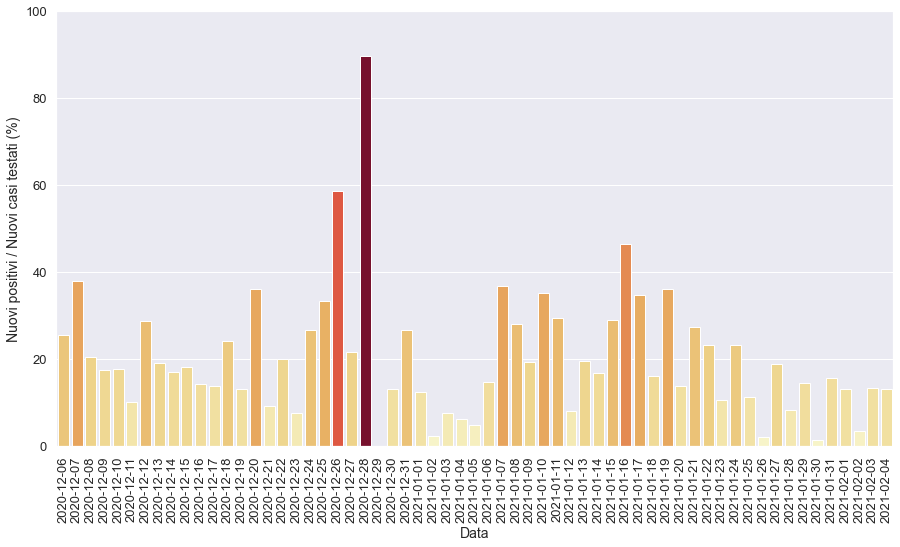

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

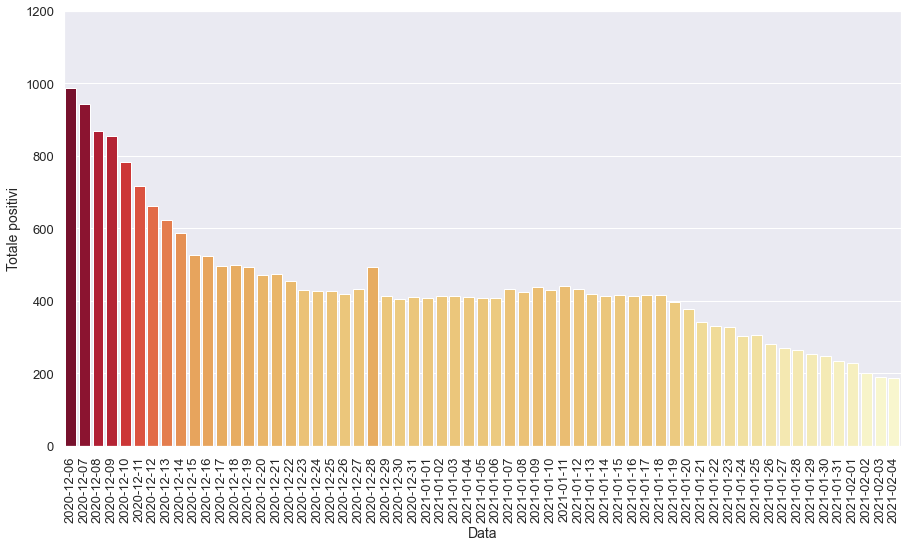

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

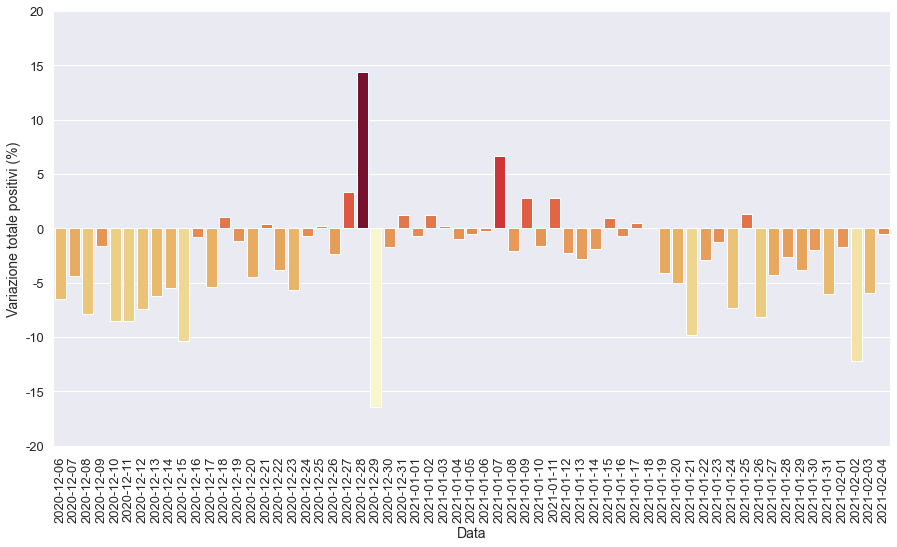

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

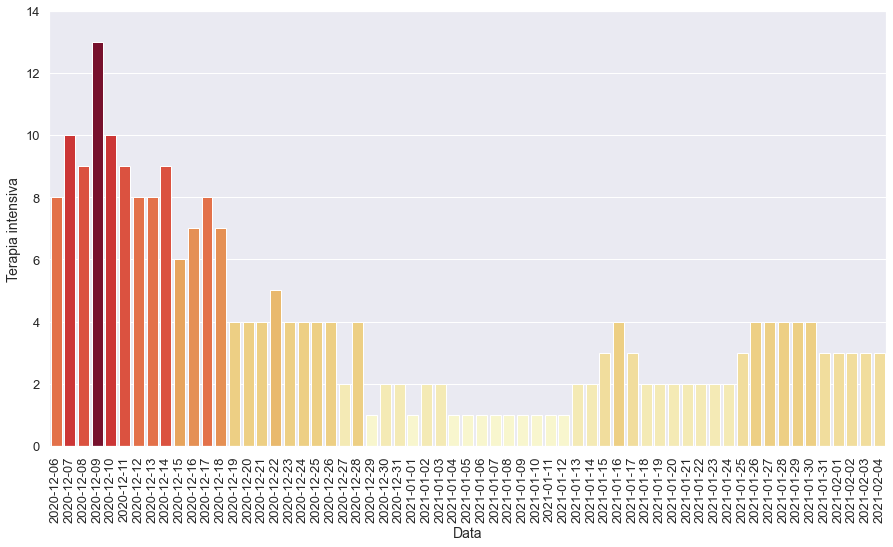

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

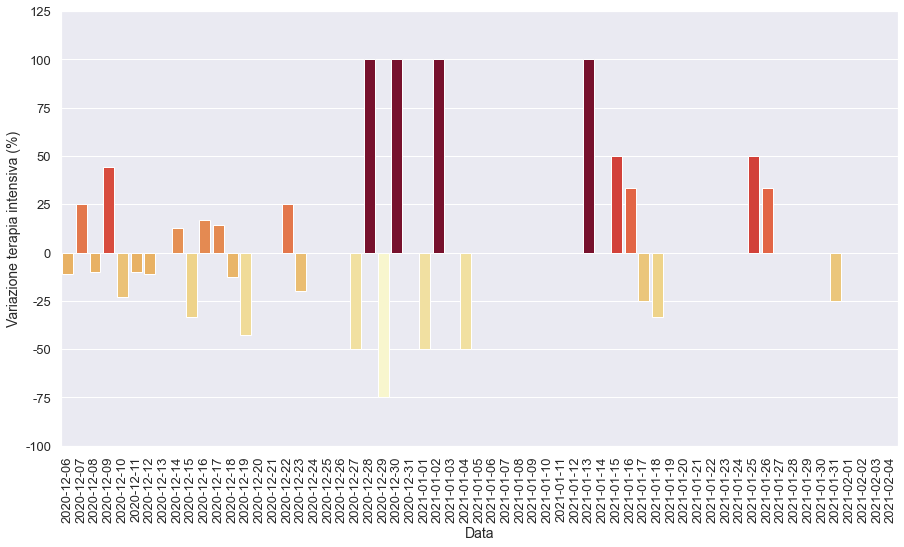

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

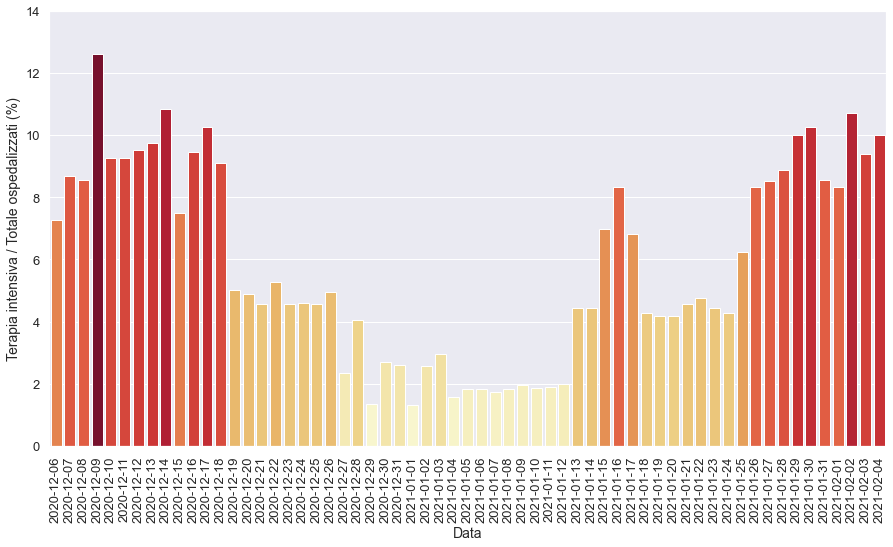

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

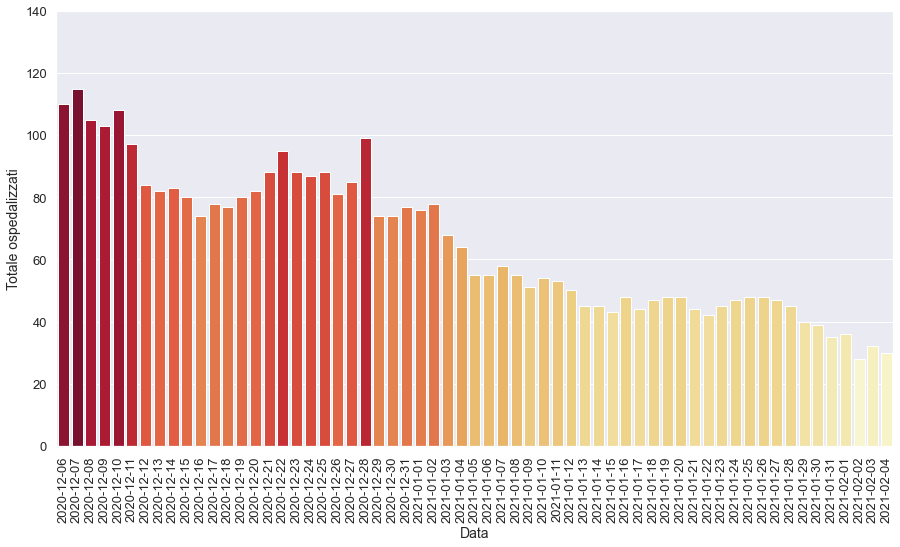

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

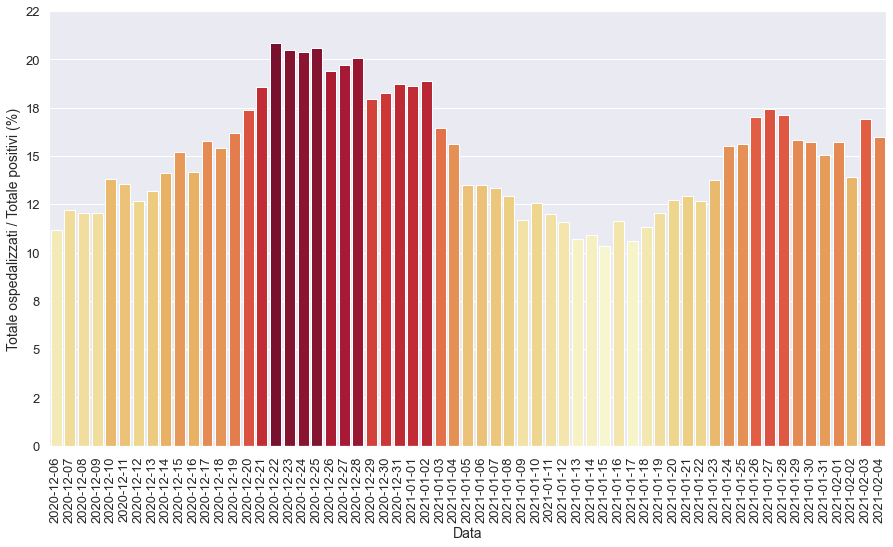

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

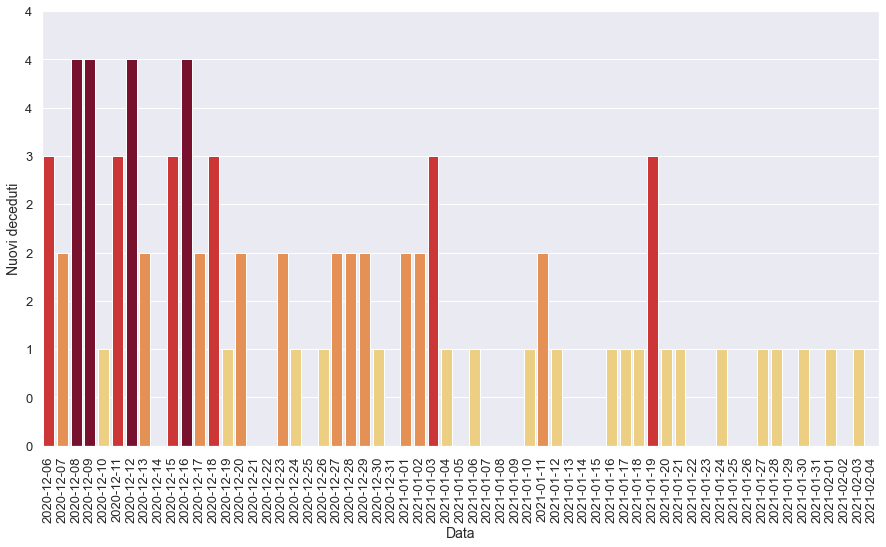

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

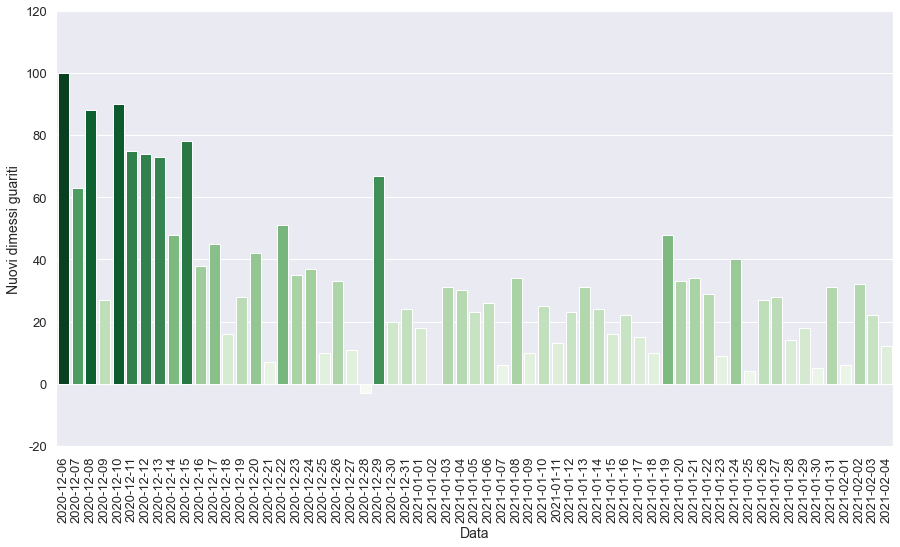

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-05T17:00:00,2,Valle d'Aosta,54,1,55,353,408,-2,21,...,0.0,262.0,435.0,7.0,1.82,13.48,8.02,4.83,0.00,-0.49
1,2021-01-06T17:00:00,2,Valle d'Aosta,54,1,55,352,407,-1,26,...,1.0,200.0,178.0,-1.0,1.82,13.51,13.00,14.61,0.00,-0.25
2,2021-01-07T17:00:00,2,Valle d'Aosta,57,1,58,376,434,27,33,...,0.0,230.0,90.0,24.0,1.72,13.36,14.35,36.67,0.00,6.63
3,2021-01-08T17:00:00,2,Valle d'Aosta,54,1,55,370,425,-9,25,...,0.0,254.0,89.0,-6.0,1.82,12.94,9.84,28.09,0.00,-2.07
4,2021-01-09T17:00:00,2,Valle d'Aosta,50,1,51,386,437,12,22,...,0.0,275.0,114.0,16.0,1.96,11.67,8.00,19.30,0.00,2.82
5,2021-01-10T17:00:00,2,Valle d'Aosta,53,1,54,376,430,-7,19,...,1.0,154.0,54.0,-10.0,1.85,12.56,12.34,35.19,0.00,-1.60
6,2021-01-11T17:00:00,2,Valle d'Aosta,52,1,53,389,442,12,27,...,2.0,256.0,92.0,13.0,1.89,11.99,10.55,29.35,0.00,2.79
7,2021-01-12T17:00:00,2,Valle d'Aosta,49,1,50,382,432,-10,14,...,1.0,330.0,173.0,-7.0,2.00,11.57,4.24,8.09,0.00,-2.26
8,2021-01-13T17:00:00,2,Valle d'Aosta,43,2,45,375,420,-12,19,...,0.0,243.0,98.0,-7.0,4.44,10.71,7.82,19.39,100.00,-2.78
9,2021-01-14T17:00:00,2,Valle d'Aosta,43,2,45,367,412,-8,16,...,0.0,223.0,96.0,-8.0,4.44,10.92,7.17,16.67,0.00,-1.90


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

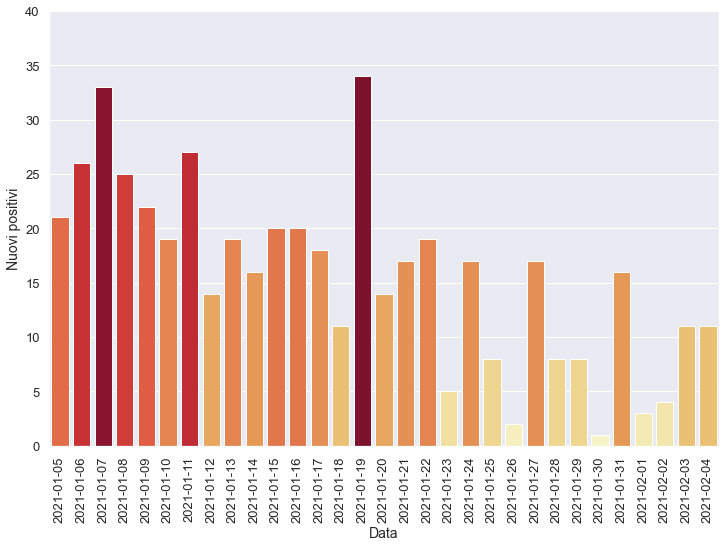

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

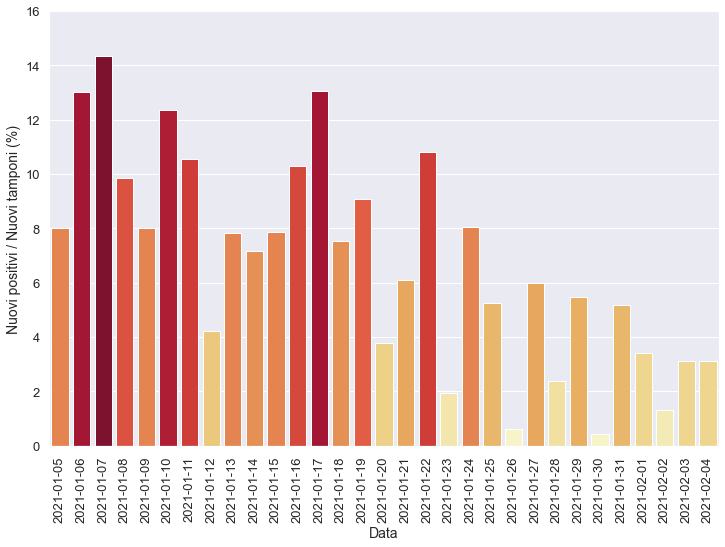

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

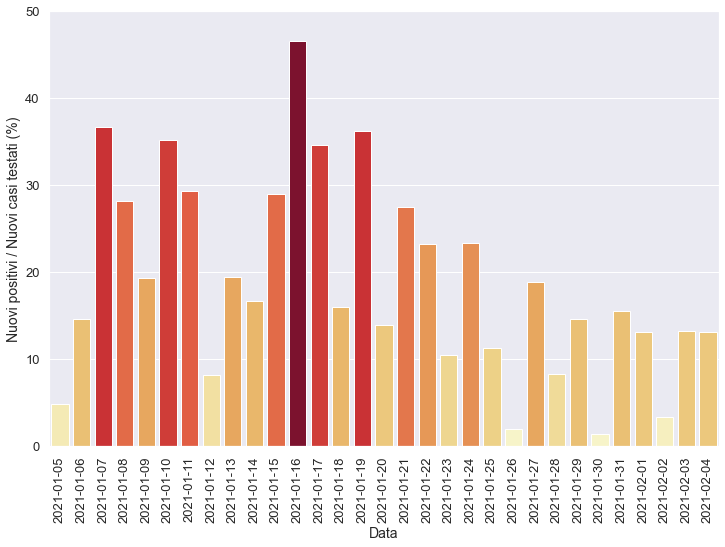

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

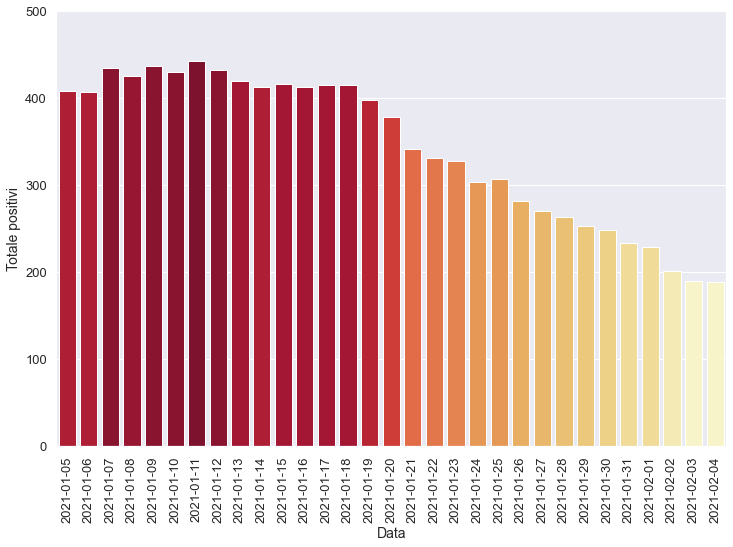

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

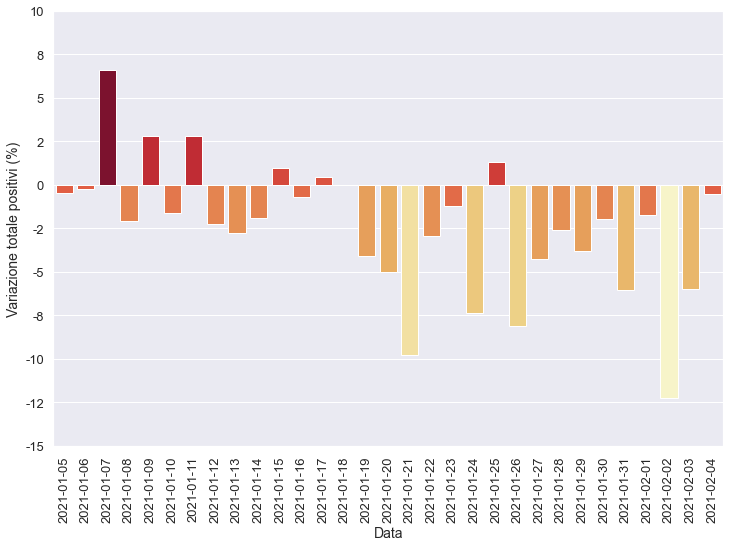

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

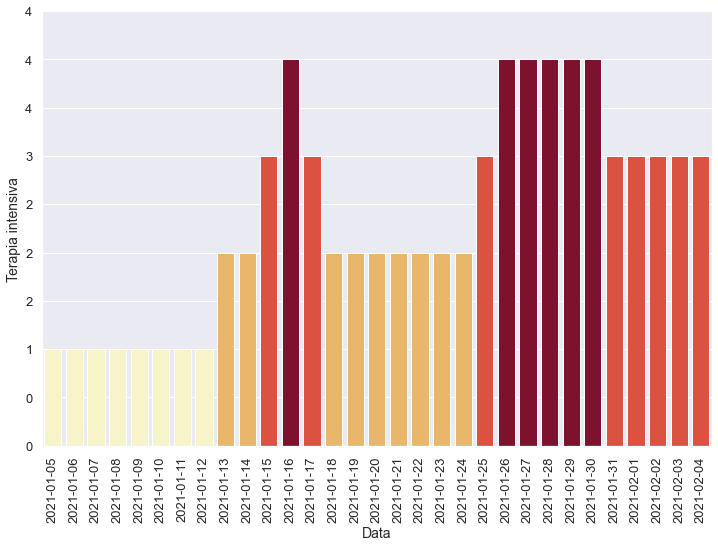

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

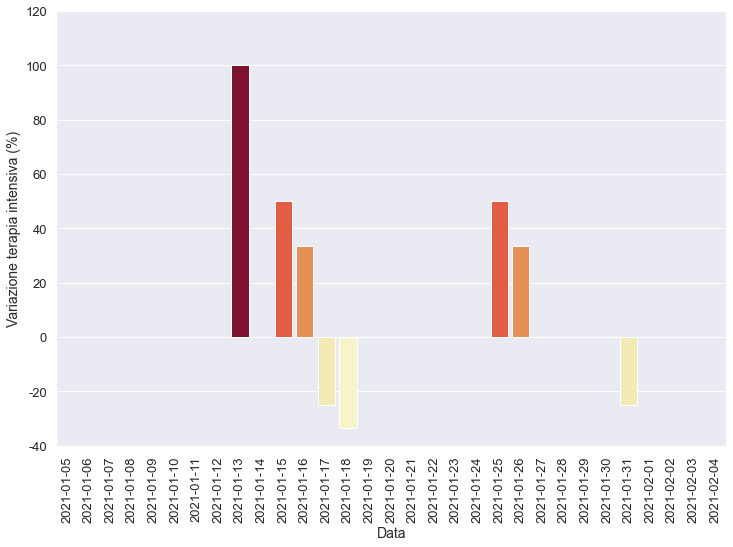

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

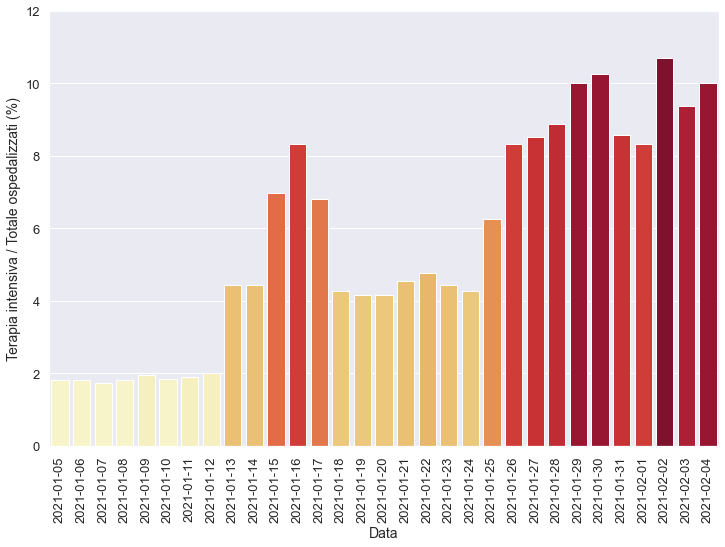

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

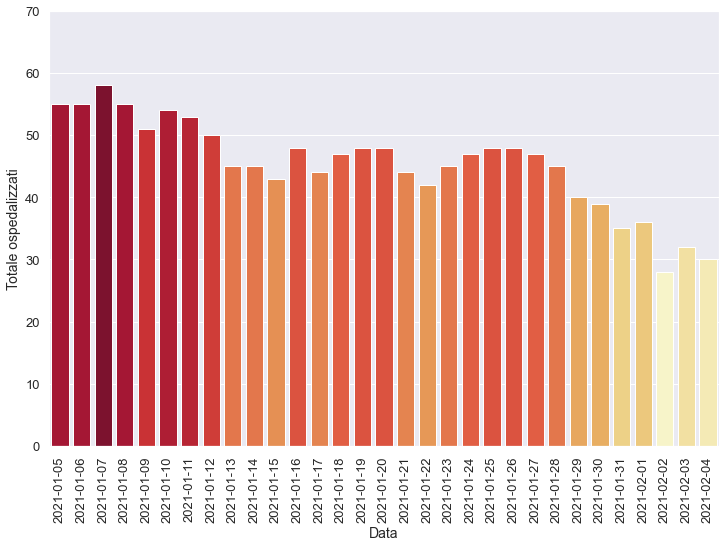

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

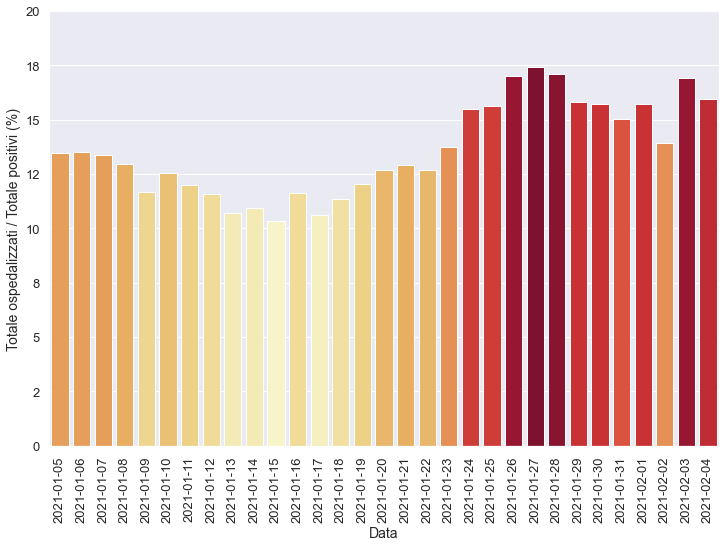

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

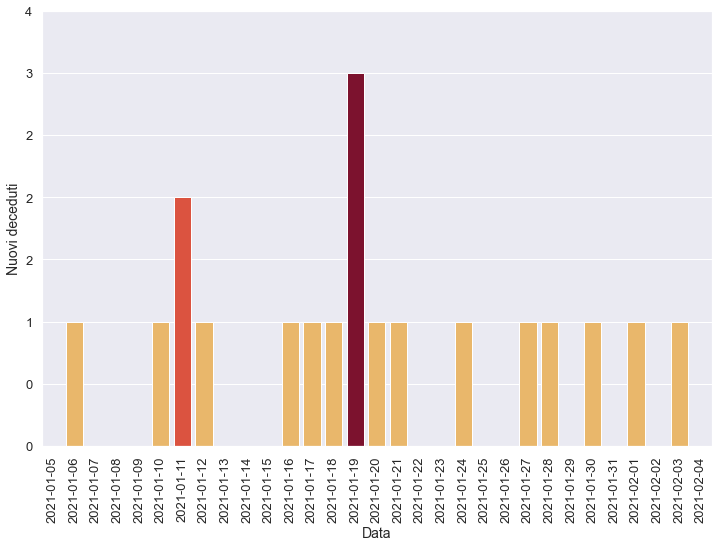

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

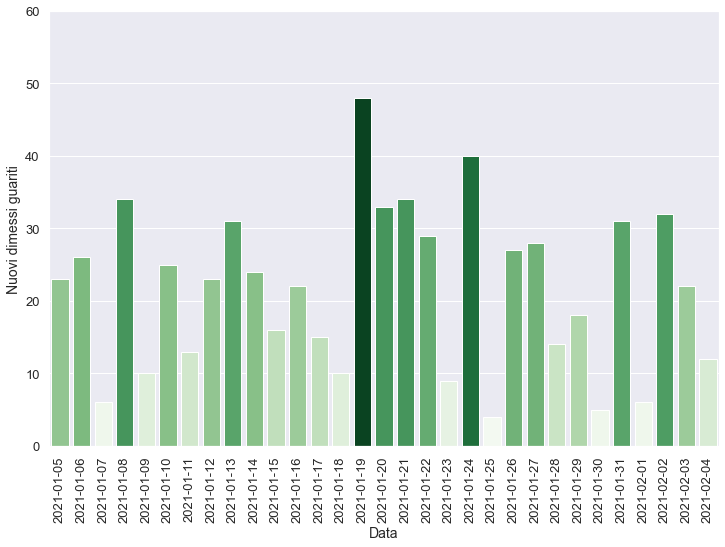

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-28T17:00:00,2,Valle d'Aosta,41,4,45,218,263,-7,8,...,1.0,338.0,97.0,-5.0,8.89,17.11,2.37,8.25,0.0,-2.59
1,2021-01-29T17:00:00,2,Valle d'Aosta,36,4,40,213,253,-10,8,...,0.0,146.0,55.0,-5.0,10.00,15.81,5.48,14.55,0.0,-3.80
2,2021-01-30T17:00:00,2,Valle d'Aosta,35,4,39,209,248,-5,1,...,1.0,235.0,74.0,-4.0,10.26,15.73,0.43,1.35,0.0,-1.98
3,2021-01-31T17:00:00,2,Valle d'Aosta,32,3,35,198,233,-15,16,...,0.0,308.0,103.0,-11.0,8.57,15.02,5.19,15.53,-25.0,-6.05
4,2021-02-01T17:00:00,2,Valle d'Aosta,33,3,36,193,229,-4,3,...,1.0,88.0,23.0,-5.0,8.33,15.72,3.41,13.04,0.0,-1.72
5,2021-02-02T17:00:00,2,Valle d'Aosta,25,3,28,173,201,-28,4,...,0.0,303.0,120.0,-20.0,10.71,13.93,1.32,3.33,0.0,-12.23
6,2021-02-03T17:00:00,2,Valle d'Aosta,29,3,32,157,189,-12,11,...,1.0,352.0,83.0,-16.0,9.38,16.93,3.12,13.25,0.0,-5.97
7,2021-02-04T17:00:00,2,Valle d'Aosta,27,3,30,158,188,-1,11,...,0.0,353.0,84.0,1.0,10.00,15.96,3.12,13.10,0.0,-0.53


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

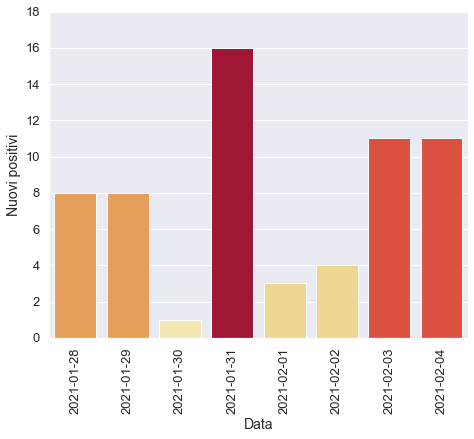

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

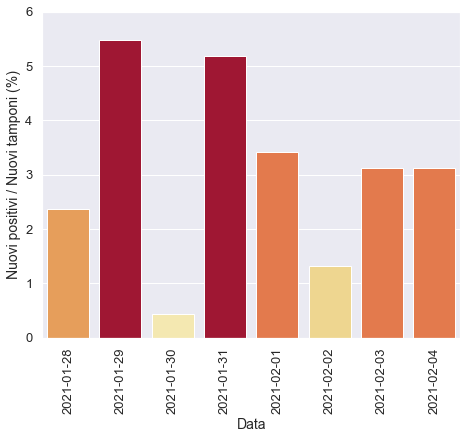

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

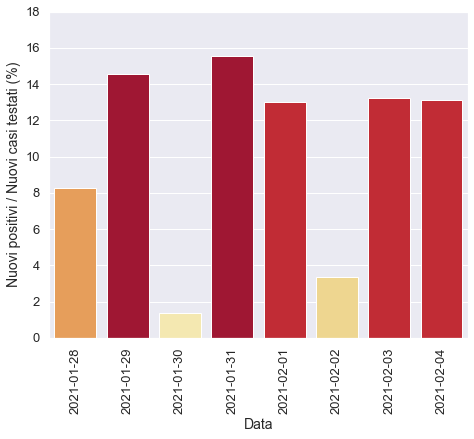

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

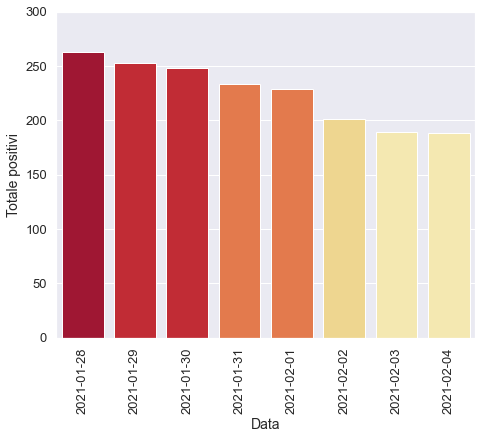

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

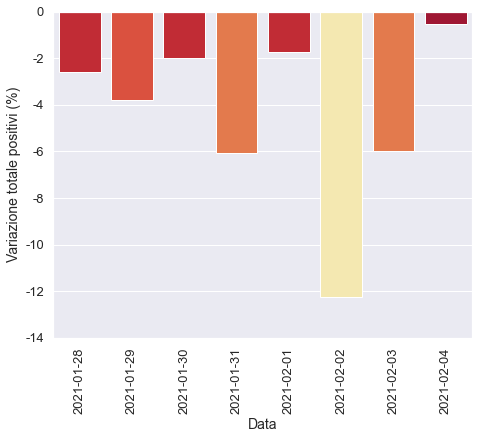

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

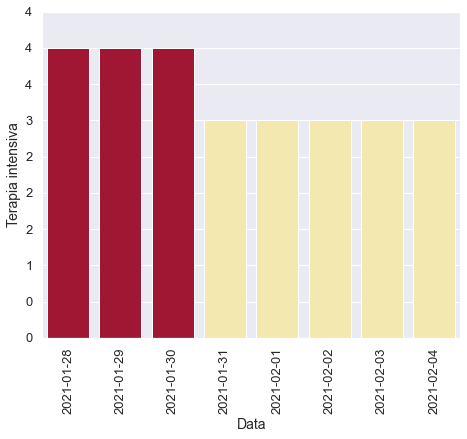

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

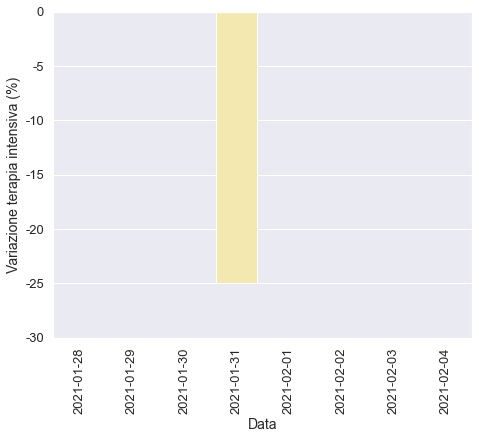

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

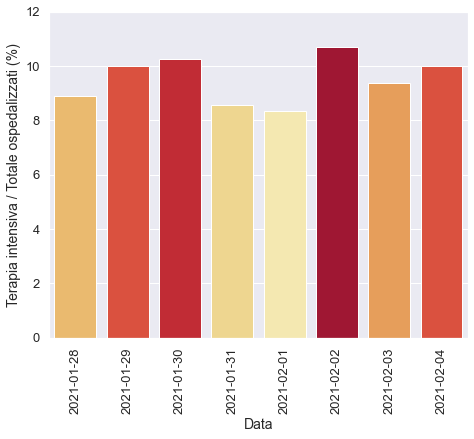

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

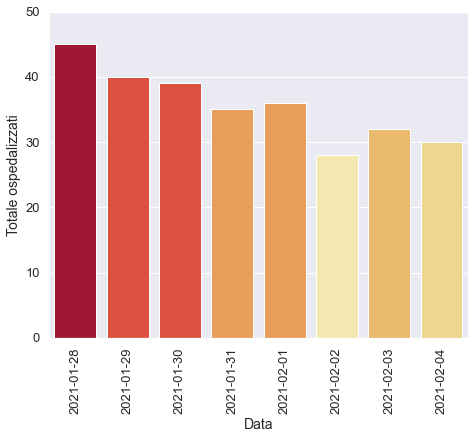

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

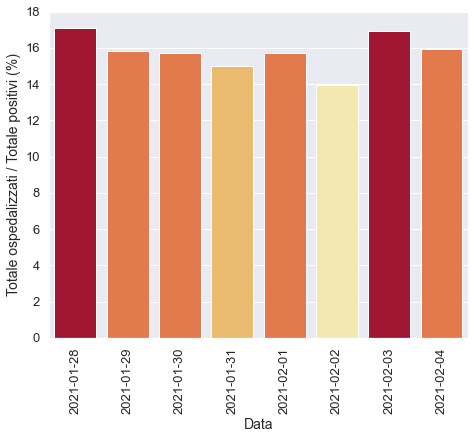

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

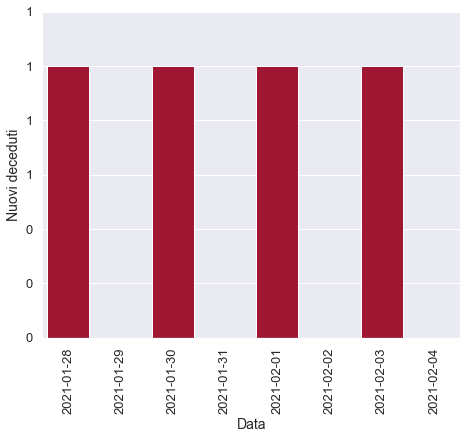

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

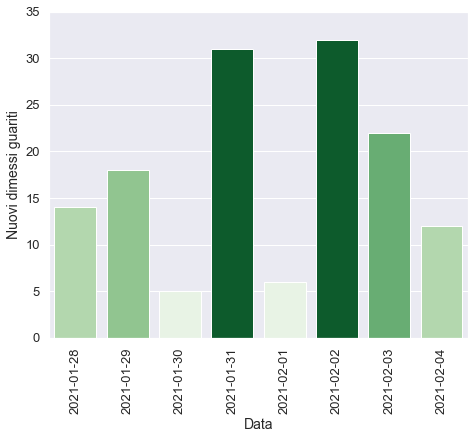

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)